In [1]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
# Esta linea permite que los graficos sean renderizados directamente en nuestro Notebook
## Carguemos en un pandas dataframe nuestra base de datos
%matplotlib inline

## Carguemos en un pandas dataframe nuestra base de datos

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <code>pd.read_csv</code> es el metodo que nos permite importar los datos desde un CSV y cargarlo en un **DataFrame**, que es la estructura de base de Pandas
</div>

In [2]:
movies = pd.read_csv('./data/peliculas.csv',encoding='utf-8')

# Cuantas lineas y columnas tiene nuestro dataframe
### Un dataframe es una estructura de datos que se compone de los elementos siguientes
display(movies.shape)

movies.head(2)

(5043, 19)

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0


<div class="alert alert-block alert-info" style="margin-top: 20px">
  Un dataframe es una estructura de datos que se compone de los elementos siguientes
</div> 

<img src="./img/dataframe_structure.png" style="margin:0 auto;clear:both">

In [3]:
#visualizemos las columnas
display(movies.columns)
display(movies.index)

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

RangeIndex(start=0, stop=5043, step=1)

In [4]:
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [5]:
linea = movies.loc[10,:]
linea

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [6]:
movies.loc[:,'movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

## Intentemos inspeccionar nuestros datos y entenderlos mejor 

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

<div class="alert alert-block alert-info" style="margin-top: 20px">
  A diferencia de Numpy, Pandas permite cargar no solo datos numericos pero tambien **datos de texto** que vemos por ejemplo en las columnas de actores y **mezclar distintos tipos de datos**.
<ul>
 <li>int64 y float64 corresponden a los mismos dtypes de Numpy </li>
 <li> object es el dtype que permite manejar datos de texto </li>
</ul>
</div>

In [8]:
movies_num = movies.select_dtypes(include='number')
movies_num.columns

Index(['title_year', 'aspect_ratio', 'duration', 'duration.1',
       'cast_total_facebook_likes', 'budget', 'imdb_score', 'gross'],
      dtype='object')

In [9]:
# Estadísticas de las columnas númericas
movies.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


In [10]:
# Estadísticas de las columnas de texto
movies.describe(exclude='number')

,movie_title,color,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name
count,5043,5024,5031,5038,5043,4740,4890,4939,5036,5030,5020
unique,4917,2,47,65,914,18,4760,2398,2097,3032,3521
top,Pan,Color,English,USA,Drama,R,based on novel,Steven Spielberg,Robert De Niro,Morgan Freeman,Ben Mendelsohn
freq,3,4815,4704,3807,236,2118,4,26,49,20,8


Para hacer nuestro primer modelo más simple para este trabajaremos solo con las columnas númericas.

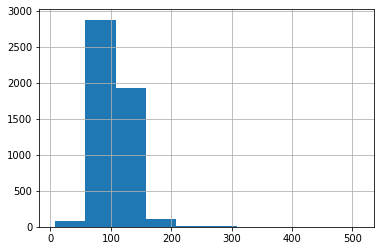

In [11]:
movies_num['duration'].hist()

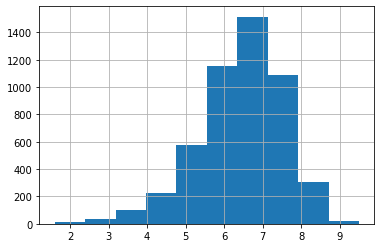

In [12]:
movies_num['imdb_score'].hist()

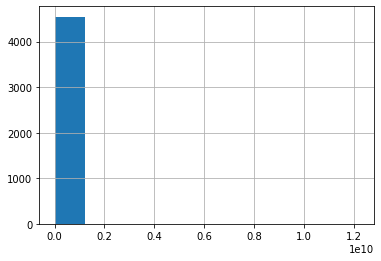

In [13]:
movies_num['budget'].hist()

<div class="alert alert-block alert-info" style="margin-top: 20px">
Para poder debuggear esta situación utilizaremos una tecnica muy tipica de pandas que se llama **boolean filtering**. Basicamente construimos una serie de booleanos con el mismo indice que nuestro dataframe (la serie clasicamente la llamaremos mask).
</div>

In [14]:
movies[movies['budget'] > 1e9]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


<img src="./img/akira.png" width="1000" style="margin:0 auto;clear:both">

 Tenemos un problema de limpieza de los datos. La BDD fue creada sin diferenciar:
- La moneda en la que se ingresaba el presupuesto y el ingreso. 
- La zona (país/mundial) en la que se registro el ingreso

# Importar BBDD thenumbers.com## Ahora manejaremos los datos faltantes (nulos o NaN). 

In [15]:
financials = pd.read_csv('./data/thenumbers.csv', index_col=0)
financials.head(2)

,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...


In [16]:
financials = financials[['movie_title','production_budget','worldwide_gross']]
financials.head(2)

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225


In [17]:
display(financials.shape)
display(movies.shape)

(4341, 3)

(5043, 19)

In [18]:
display(movies['movie_title'])
display(movies_num.head(2))

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0


In [19]:
movies_num = pd.concat([movies_num, movies['movie_title']],axis=1)
movies_num.head(2)

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End


In [20]:
movies_v2 = pd.merge(financials,movies_num,on='movie_title',how='left')

display(movies_v2.shape)
movies_v2.head(2)

(4385, 11)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


## Ahora solucionaremos el problema de los datos faltantes (nulos o NaN). 

<div class="alert alert-success">
  Los datos faltantes generan problemas con muchos algoritmos de ML. Es por esto que existen distintas estrategias para lidiar con ellos.
</div>

In [21]:
display(movies_v2.isna().apply(pd.Series.value_counts))
display((movies_v2 == 0).apply(pd.Series.value_counts))

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714
True,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671


,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0
True,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN


No podemos entrenar nuestro algoritmo con datos cuya variable objetivo no esta definida o sea nula (valor falso). Eliminemos esas líneas.

In [22]:
mask = (movies_v2['worldwide_gross'].notna()) & (movies_v2['worldwide_gross'] != 0 )
movies_v2 = movies_v2[mask]

display( movies_v2.isna().apply(pd.Series.value_counts) )
display( (movies_v2 == 0).apply(pd.Series.value_counts) )

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,4104.0,4104.0,4104.0,4077,3942,4094,4094,4104.0,3805,4104.0,3706
True,NaN,NaN,NaN,27,162,10,10,NaN,299,NaN,398


,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,4104.0,4104.0,4104.0,4104.0,4104.0,4104.0,4104.0,4084,4104.0,4104.0,4104.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN


<div class="alert alert-success">
  En el caso de las features que no son la variable objetivo una mejor solución para lidiar con los datos faltantes es <strong>remplazar estos datos por otros que sean manejables</strong> y no afecten la calidad de las predicciones. La estrategia más comun es utilizar la media de todos los ejemplos para la feature dada.
</div>

In [23]:
movies_v2.drop(columns=['movie_title', 'duration.1'], inplace=True)
movies_v2.head(2)

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN


In [24]:
movies_v2.mean()

production_budget            3.339455e+07
worldwide_gross              9.580341e+07
title_year                   2.002131e+03
aspect_ratio                 2.126976e+00
duration                     1.085772e+02
cast_total_facebook_likes    1.035224e+04
budget                       4.045539e+07
imdb_score                   6.457042e+00
gross                        4.831933e+07
dtype: float64

In [25]:
movies_v2.fillna(movies_v2.mean(), inplace=True)
display(movies_v2.isna().apply(pd.Series.value_counts))
movies_v2.head(2)

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
False,4104,4104,4104,4104,4104,4104,4104,4104,4104


,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.000000,1.780000,178.000000,4834,2.370000e+08,7.9,7.605058e+08
1,306000000,2058662225,2002.130733,2.126976,108.577186,143,4.045539e+07,7.1,4.831933e+07


In [26]:
movies_v2.to_csv('./data/transformed/peliculas_clean.csv',index=False)